#conda install -c plotly plotly

In [1]:
# This code calculates the KGE and other stats for comparing EFAS output with observed flow timeseries
import pandas as pd
import numpy as np
from numpy.random import rand
import plotly.express as px
import matplotlib
from calendar import monthrange
from datetime import datetime
# Using graph_objects
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plot
from plotly.subplots import make_subplots
pd.plotting.register_matplotlib_converters()
import plotly.io as pio
pio.renderers.default = "browser"

In [2]:
EfasSel = pd.read_excel('Antalya_dis24_1997_2015.xlsx', index_col=0)
#station = stations.sample(n=1) # We can randomly choose a station
#EfasSel.set_index('Date', inplace=True)

ObsSel = pd.read_excel('Agi_Antalya_1997-2015.xlsx', index_col=0) #E09A099 empty
##ObsSel = pd.read_excel('FlowBook_Antalya_Basin_2006_2015_TimeSeries_ALL.xlsx', index_col=0) #Prepared by Ky
#station = stations.sample(n=1) # We can randomly choose a station
#ObsSel.set_index('Date', inplace=True)

EfasInfo = pd.read_excel('Stations_Antalya.xlsx', index_col=0)

## Calculate Signatures
Stats = pd.DataFrame()
StatsCalc = pd.DataFrame()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

# This part is just for redifining Prepared ObsSel data

In [3]:
ObsSel.columns.values
#Check column values of  Prepared ObsSel data
# Too much station in there

array(['datetime', 'D09A002', 'D09A006', 'D09A011', 'D09A013', 'D09A016',
       'D09A031', 'D09A034', 'D09A039', 'D09A042', 'D09A056', 'D09A057',
       'D09A060', 'D09A065', 'D09A067', 'D09A068', 'D09A075', 'D09A084',
       'D09A086', 'D09A088', 'D09A089', 'D09A091', 'D09A095', 'D09A098',
       'D09A100', 'D09A101', 'D09A104', 'D09A111', 'D09A114', 'D09A116',
       'D09A117', 'D09A118', 'D09A120', 'D09A121', 'D09A122', 'D09A123',
       'D09A124', 'D09A125', 'D09A126', 'D09A127', 'D09A131', 'D09A132',
       'D09A133', 'D09A134', 'D09A135', 'E09A002', 'E09A012', 'E09A017',
       'E09A018', 'E09A019', 'E09A020', 'E09A021', 'E09A022', 'E09A024',
       'E09A027', 'E09A028', 'E09A029', 'E09A030', 'E09A031', 'E09A032',
       'E09A033', 'E09A099'], dtype=object)

In [4]:
EfasInfo.stname.values
# Looking for selected stations

array(['D09A034', 'D09A065', 'D09A067', 'D09A068', 'D09A086', 'D09A089',
       'D09A095', 'D09A101', 'D09A122', 'E09A002', 'E09A012', 'E09A017',
       'E09A021', 'E09A022', 'E09A024', 'E09A099'], dtype=object)

In [5]:
lis=list(EfasInfo.stname.values)
# Write chosen stations as list
lis.append('datetime')
# datetime not in the list so we append it

In [6]:
lis

['D09A034',
 'D09A065',
 'D09A067',
 'D09A068',
 'D09A086',
 'D09A089',
 'D09A095',
 'D09A101',
 'D09A122',
 'E09A002',
 'E09A012',
 'E09A017',
 'E09A021',
 'E09A022',
 'E09A024',
 'E09A099',
 'datetime']

In [7]:
ObsSel = ObsSel[lis]
# Filter ObsSel stations to show only the ones in EfasInfo

In [8]:
#Datetime value of  06:00:00 do not correspond with 00:00:00
# Without matching names droping EfasSel data is not possible in my way for dropna()
# This time actually not important because this date is already 24 hour mean values 
x = []
for i in ObsSel.datetime:
    a = str(i).replace("06:","00:")
    x.append(a)
    #i.replace("06:00:00","00:00:00")

In [9]:
x

['2005-10-01 00:00:00',
 '2005-10-02 00:00:00',
 '2005-10-03 00:00:00',
 '2005-10-04 00:00:00',
 '2005-10-05 00:00:00',
 '2005-10-06 00:00:00',
 '2005-10-07 00:00:00',
 '2005-10-08 00:00:00',
 '2005-10-09 00:00:00',
 '2005-10-10 00:00:00',
 '2005-10-11 00:00:00',
 '2005-10-12 00:00:00',
 '2005-10-13 00:00:00',
 '2005-10-14 00:00:00',
 '2005-10-15 00:00:00',
 '2005-10-16 00:00:00',
 '2005-10-17 00:00:00',
 '2005-10-18 00:00:00',
 '2005-10-19 00:00:00',
 '2005-10-20 00:00:00',
 '2005-10-21 00:00:00',
 '2005-10-22 00:00:00',
 '2005-10-23 00:00:00',
 '2005-10-24 00:00:00',
 '2005-10-25 00:00:00',
 '2005-10-26 00:00:00',
 '2005-10-27 00:00:00',
 '2005-10-28 00:00:00',
 '2005-10-29 00:00:00',
 '2005-10-30 00:00:00',
 '2005-10-31 00:00:00',
 '2005-11-01 00:00:00',
 '2005-11-02 00:00:00',
 '2005-11-03 00:00:00',
 '2005-11-04 00:00:00',
 '2005-11-05 00:00:00',
 '2005-11-06 00:00:00',
 '2005-11-07 00:00:00',
 '2005-11-08 00:00:00',
 '2005-11-09 00:00:00',
 '2005-11-10 00:00:00',
 '2005-11-11 00:

In [10]:
ObsSel["datetime"] = x

In [11]:
ObsSel["datetime"] = pd.to_datetime(ObsSel['datetime'], format="%Y-%m-%d %X")


In [12]:
ObsSel =ObsSel.set_index("datetime")

In [13]:
ObsSel

,D09A034,D09A065,D09A067,D09A068,D09A086,D09A089,D09A095,D09A101,D09A122,E09A002,E09A012,E09A017,E09A021,E09A022,E09A024,E09A099
datetime,,,,,,,,,,,,,,,,
2005-10-01,0.128,0.042,0.005,0.048,0.066,1.15,0.350,32.6,0.054,30.0,0.0,4.12,1.20,1.64,2.16,0.503
2005-10-02,0.260,0.042,0.006,0.075,0.066,1.15,0.462,32.6,0.133,30.0,0.0,4.12,1.38,1.64,2.16,4.570
2005-10-03,0.435,0.042,0.010,0.075,0.066,1.15,0.518,36.0,0.054,35.0,0.0,4.58,3.42,1.88,2.25,4.350
2005-10-04,0.385,0.042,0.034,0.075,0.066,1.15,0.462,36.0,0.054,33.0,0.0,4.58,1.73,1.88,2.25,2.130
2005-10-05,0.345,0.042,0.039,0.075,0.066,1.15,0.462,34.2,0.054,32.0,0.0,4.12,1.49,1.75,2.16,1.380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-09-26,0.610,0.028,0.040,0.523,1.090,5.66,0.542,45.6,0.055,40.7,14.4,5.00,1.22,2.82,2.46,0.173
2015-09-27,0.610,0.028,0.029,0.454,0.857,5.36,0.511,45.6,0.055,40.7,13.8,4.69,1.22,2.82,2.46,0.173
2015-09-28,0.610,0.028,0.024,0.454,0.973,5.36,0.511,45.6,0.038,40.7,13.3,4.69,1.22,2.82,2.46,0.199


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Fill NaN values with Mean Value of column

# For empty E09A099
EfasSel =EfasSel.drop(['E09A099'], axis = 1)
ObsSel =ObsSel.drop(['E09A099'], axis = 1)

In [17]:
ObsSel.isnull().sum().sort_values(ascending = False)

D09A034    74
D09A065     0
D09A067     0
D09A068     0
D09A086     0
D09A089     0
D09A095     0
D09A101     0
D09A122     0
E09A002     0
E09A012     0
E09A017     0
E09A021     0
E09A022     0
E09A024     0
E09A099     0
dtype: int64

In [18]:
ObsSel = ObsSel.dropna()

In [19]:
ObsSel.isnull().sum().sort_values(ascending = False)

D09A034    0
D09A065    0
D09A067    0
D09A068    0
D09A086    0
D09A089    0
D09A095    0
D09A101    0
D09A122    0
E09A002    0
E09A012    0
E09A017    0
E09A021    0
E09A022    0
E09A024    0
E09A099    0
dtype: int64

In [20]:
len(ObsSel.T.columns)

3578

In [21]:
len(EfasSel.T.columns)

4017

In [22]:
EfasSel.index.isin(ObsSel.T.columns)

array([False, False, False, ..., False, False, False])

In [23]:
filtt = EfasSel.index.isin(ObsSel.T.columns)

In [24]:
EfasSel = EfasSel[filtt]

In [25]:
filtt2 = ObsSel.index.isin(EfasSel.T.columns)

In [26]:
ObsSel = ObsSel[filtt2]

In [27]:
Beta = []
for i in range(len(ObsSel.columns)):
    
    Beta.append(EfasSel.iloc[:,i].mean()/ObsSel.iloc[:,i].mean())
    print(EfasSel.columns[i], Beta[i])

D09A034 1.0575674803723516
D09A065 1.2078960163739247
D09A067 1.8956403441881082
D09A068 1.4945089204812627
D09A086 0.8868418748185607
D09A089 0.9558188742147513
D09A095 35.39336503769427
D09A101 0.34162875692366657
D09A122 0.6982134754758591
E09A002 0.28919406196507674
E09A012 0.6907333425157143
E09A017 0.08341724250448175
E09A021 0.7312969428172562
E09A022 0.7984503837433943
E09A024 0.9783864045098937
E09A099 0.6941303946944225


In [28]:
Alpha = []
for i in range(len(ObsSel.columns)):
    
    Alpha.append(EfasSel.iloc[:,i].std()/ObsSel.iloc[:,i].std())
    print(EfasSel.columns[i], Alpha[i])

D09A034 1.037423452263989
D09A065 0.6737785106919164
D09A067 1.2137827464316409
D09A068 1.0291400556936796
D09A086 0.4736641587795728
D09A089 1.7671960593845941
D09A095 22.950379075557997
D09A101 0.458863323757933
D09A122 0.5091246564817107
E09A002 0.4558396454484436
E09A012 0.915403814140503
E09A017 0.12373953561353088
E09A021 0.8011684624532528
E09A022 1.20691828144605
E09A024 1.323531211475209
E09A099 0.501435298287312


# Drop D09A095 because its Alpha and Beta are problematic
EfasSel =EfasSel.drop(['D09A095'], axis = 1)
ObsSel =ObsSel.drop(['D09A095'], axis = 1)
print(ObsSel.columns)

# Try Above code with corrected data

In [30]:
# FDC Signatures
# Sort observed and simulated flows

ObsSelSort = ObsSel.apply(lambda x: x.sort_values(ascending=False).values)
EfasSelSort = EfasSel.apply(lambda x: x.sort_values(ascending=False).values)
leng=len(EfasSelSort)
EfasSelSort['Ind'] = range(1, leng+1)
EfasSelSort['Ind'] = EfasSelSort['Ind'].div(leng)
EfasSelSort.set_index('Ind', inplace=True)
ObsSelSort['Ind'] = range(1, leng+1)
ObsSelSort['Ind'] = ObsSelSort['Ind'].div(leng)
ObsSelSort.set_index('Ind', inplace=True)

ObsSelSortNorm = ObsSelSort.copy()
EfasSelSortNorm = EfasSelSort.copy()

In [31]:
# Normalize by watershed area
for pg in ObsSelSort.columns:
    areas = float(EfasInfo.area[(EfasInfo['stname'] == pg)])
    ObsSelSortNorm[pg] = 1000*(ObsSelSort[pg] / (areas*1000000)) #  convert km2 to m2 than to mm
    EfasSelSortNorm[pg] = 1000*(EfasSelSort[pg] / (areas*1000000))

IndexError: index 15 is out of bounds for axis 0 with size 15

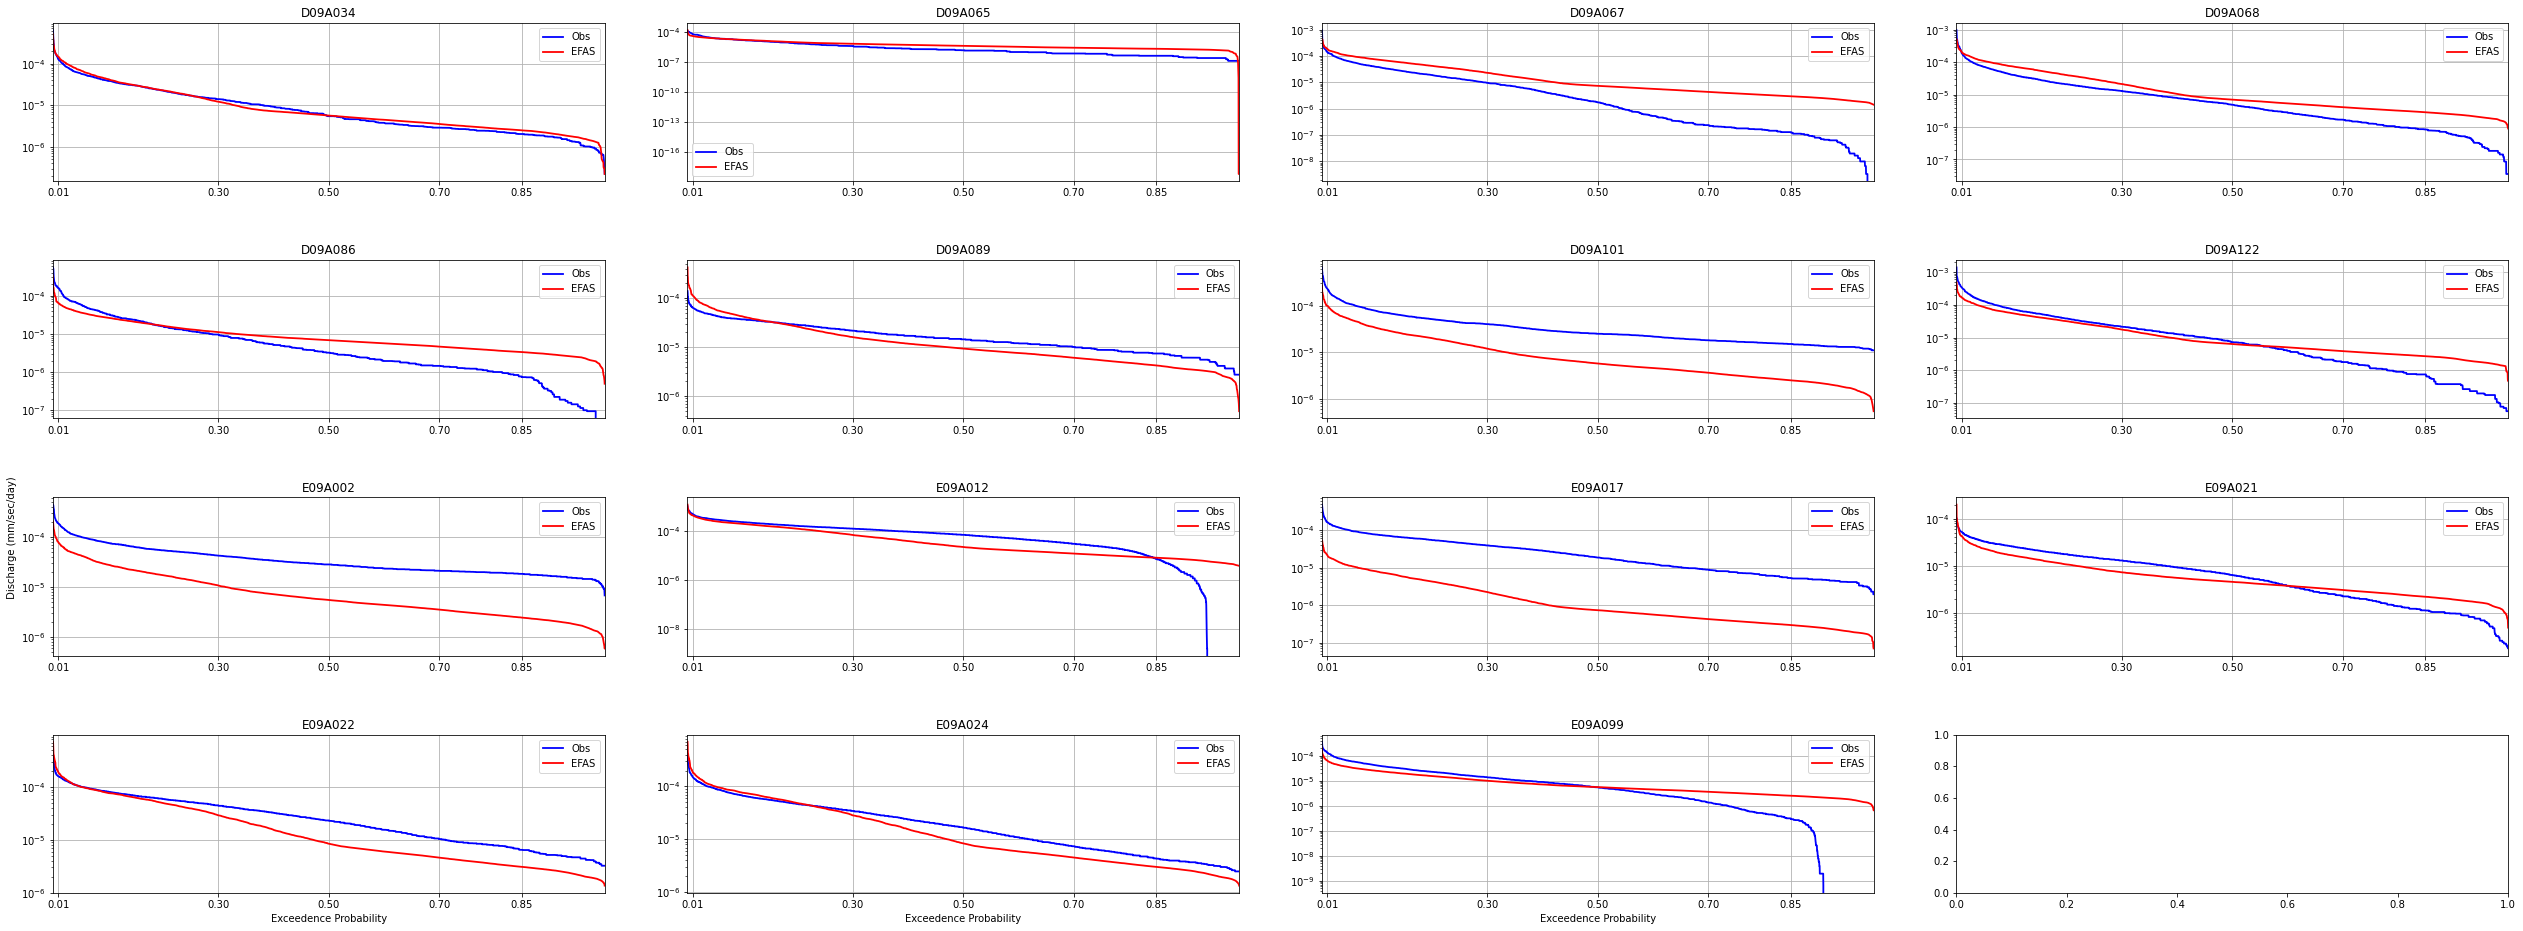

In [32]:
# Plot FDCs
fig, axs = plot.subplots(4,4, figsize=(44, 16), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.15)
axs = axs.ravel()
for i in range(16):
    axs[i].plot(ObsSelSort.columns[i], data=ObsSelSortNorm,  linestyle='-', color='blue', linewidth=1.8, label='Obs')
    axs[i].plot(ObsSelSort.columns[i], data=EfasSelSortNorm,  linestyle='-', color='red', linewidth=1.8, label='EFAS')
    axs[i].set_yscale('log')
    axs[i].set_title(str(ObsSelSort.columns[i]))
    axs[i].set_xticks([0.01, 0.3, 0.5, 0.7, 0.85])
    axs[i].grid()
    axs[i].set_xlim(left=0, right=1)
    axs[i].legend()
    if i == 8:
        axs[i].set_ylabel('                         Discharge (mm/sec/day)', fontsize=10)
    if i > 11:
        axs[i].set_xlabel('Exceedence Probability', fontsize=10)

fig.savefig('FDC_Obs_Sim_Antalya_ky_2006_2015.png')
fig.show()


In [33]:
# Define FDC thresholds
H5 = round(0.01 * len(ObsSelSortNorm)) + 1
H30 = round(0.30 * len(ObsSelSortNorm)) + 1
H50 = round(0.50 * len(ObsSelSortNorm)) + 1
H70 = round(0.70 * len(ObsSelSortNorm)) + 1
H85 = round(0.85 * len(ObsSelSortNorm)) + 1

In [37]:
for pg in ObsSel.columns:
    TSSel = pd.DataFrame()
    TSSel = pd.concat([EfasSelSortNorm[pg], ObsSelSortNorm[pg]], axis=1, ignore_index=True, sort=False)
    TSSel = TSSel.rename(columns={0: "Sim", 1: "Obs"})
    leng = len(TSSel)
    TSSel['Ind'] = range(0, leng )
    TSSel.set_index('Ind', inplace=True)
    # For observed values
    TSSel["H5Obs"] = np.log10(TSSel['Obs'][H5])
    TSSel["H50Obs"] = np.log10(TSSel['Obs'][H50])
    TSSel["H85Obs"] = np.log10(TSSel['Obs'][H85])
    TSSel["HSLObs"] = np.log10(TSSel['Obs'][H30]) - np.log10(TSSel['Obs'][H70])
    # For sim values
    TSSel["H5Sim"] = np.log10(TSSel['Sim'][H5])
    TSSel["H50Sim"] = np.log10(TSSel['Sim'][H50])
    TSSel["H85Sim"] = np.log10(TSSel['Sim'][H85])
    TSSel["HSLSim"] = np.log10(TSSel['Sim'][H30]) - np.log10(TSSel['Sim'][H70])

    StatsCalc = TSSel.iloc[0]
    StatsCalc["Station"] = pg

    Stats = Stats.append(StatsCalc)

C:\Users\PC\anaconda3\lib\site-packages\pandas\core\series.py:1056: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\PC\anaconda3\lib\site-packages\pandas\core\indexing.py:1724: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



C:\Users\PC\AppData\Local\Temp/ipykernel_6784/1978981604.py:22: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



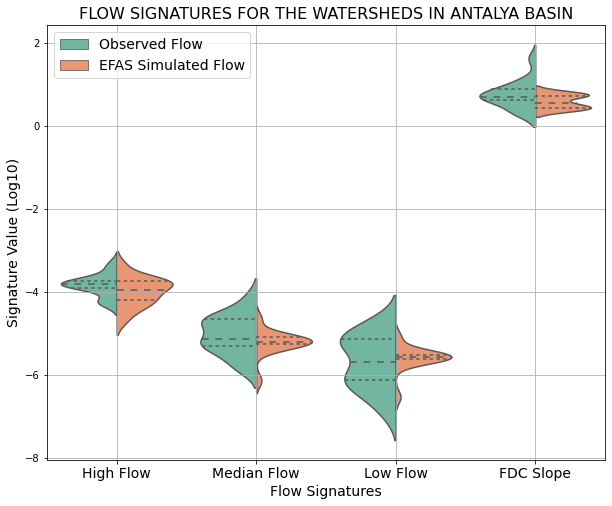

In [38]:
# Export Stats
Stats.to_excel('Stats_Antalya_ky_2006_2015.xlsx')
StatsMeltedObs = Stats.melt(id_vars='Station', value_vars=["H5Obs", "H50Obs", "H85Obs", "HSLObs" ])
StatsMeltedSim = Stats.melt(id_vars='Station', value_vars=["H5Sim", "H50Sim", "H85Sim", "HSLSim" ])
StatsMeltedObs["Type"] = "Observed Flow"
StatsMeltedSim["Type"] = "EFAS Simulated Flow"
StatsMeltedObs['variable'] = StatsMeltedObs['variable'].map(lambda x: x.rstrip('Obs'))
StatsMeltedSim['variable'] = StatsMeltedSim['variable'].map(lambda x: x.rstrip('Sim'))

StatsMelted = pd.concat([StatsMeltedObs, StatsMeltedSim], ignore_index=True)
fig, axv = plot.subplots(figsize=(10,8))
axv = sns.violinplot(x="variable", y="value", hue="Type", data=StatsMelted, palette="Set2", split=True,
                    scale="count", inner="quartile")
axv.grid()
axv.legend(loc=2,prop={'size':14})
labels = [item.get_text() for item in axv.get_xticklabels()]
labels = ['High Flow','Median Flow','Low Flow','FDC Slope']
axv.set_xticklabels(labels, fontsize=14)
axv.set_title('FLOW SIGNATURES FOR THE WATERSHEDS IN ANTALYA BASIN', fontsize=16)
axv.set_ylabel('Signature Value (Log10)', fontsize=14)
axv.set_xlabel('Flow Signatures', fontsize=14)
fig.show()
fig.savefig('FDC_Signatures_Antalya_ky_2005_2015.png')

C:\Users\PC\anaconda3\lib\site-packages\pandas\core\series.py:1056: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\PC\anaconda3\lib\site-packages\pandas\core\indexing.py:1724: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



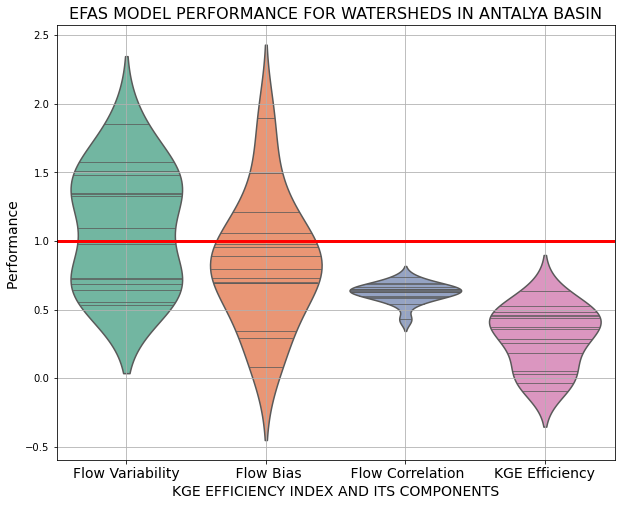

C:\Users\PC\AppData\Local\Temp/ipykernel_6784/3999954226.py:44: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



In [39]:
import matplotlib.pyplot as plt
##KGE and Components
KGE = pd.DataFrame()
KGECalc = pd.DataFrame()
for pg in ObsSel.columns:
    TSSel = pd.DataFrame()
    TSSel = pd.concat([EfasSel[pg], ObsSel[pg]], axis=1, ignore_index=True, sort=False)
    TSSel = TSSel.rename(columns={0: "Sim", 1: "Obs"})
    # Calculate KGE Components
    TSSel["MeanObs"] = TSSel["Obs"].mean()
    TSSel["MeanSim"] = TSSel["Sim"].mean()

    TSSel["StdObs"] = TSSel["Obs"].std() / TSSel["MeanObs"]
    TSSel["StdSim"] = TSSel["Sim"].std() / TSSel["MeanSim"]

    TSSel["Alpha"] = TSSel["StdSim"] / TSSel["StdObs"]
    TSSel["Beta"] = TSSel["MeanSim"] / TSSel["MeanObs"]

    TSSel["Corr"] = TSSel["Sim"].corr(TSSel["Obs"])
    TSSel["KGE"] = 1 - ((TSSel["Corr"] - 1)**2 + (TSSel["Alpha"] - 1)**2 + (TSSel["Beta"] - 1)**2)**0.5
    KGECalc = TSSel.iloc[0]
    KGECalc["Station"] = pg

    KGE = KGE.append(KGECalc)

# Export KGE
KGE.to_excel('Stats_KGE_Antalya_ky_2006_2015.xlsx')

# Plot KGE and Components
KGEMelted = KGE.melt(id_vars='Station', value_vars=["Alpha", "Beta", "Corr", "KGE"])

fig, axv = plot.subplots(figsize=(10,8))
axv = sns.violinplot(x="variable", y="value", data=KGEMelted, palette="Set2", split=True,
                    scale="count", inner="stick")
axv.grid()
labels = [item.get_text() for item in axv.get_xticklabels()]
labels = ['Flow Variability',' Flow Bias',' Flow Correlation','KGE Efficiency']
axv.set_xticklabels(labels, fontsize=14)
axv.set_title('EFAS MODEL PERFORMANCE FOR WATERSHEDS IN ANTALYA BASIN', fontsize=16)
axv.set_ylabel('Performance ', fontsize=14)
axv.set_xlabel('KGE EFFICIENCY INDEX AND ITS COMPONENTS', fontsize=14)
plt.axhline(y=1, lw=3, color='r')
plt.show()
fig.show()
fig.savefig('KGE_Components_Antalya_ky_2005_2015.png')